# Tạo thu nhập ảo

In [1]:
import numpy as np
import pandas as pd

# Khai báo các tầng thu nhập và tỷ lệ phần trăm (từ biểu đồ)
income_tiers = [
    {"range": (40_000_000, 80_000_000), "percent": 0.03},  # A
    {"range": (30_000_000, 40_000_000), "percent": 0.04},  # B
    {"range": (20_000_000, 30_000_000), "percent": 0.22},  # C
    {"range": (15_000_000, 20_000_000), "percent": 0.27},  # D
    {"range": (10_000_000, 15_000_000), "percent": 0.20},  # E
    {"range": (5_000_000, 10_000_000), "percent": 0.24},   # F (giả định không có thu nhập < 5tr)
]

# Tổng số người
n_people = 1000
data = []

# Tạo ngẫu nhiên thu nhập theo tầng
for tier in income_tiers:
    n_samples = int(tier["percent"] * n_people)
    incomes = np.random.uniform(tier["range"][0], tier["range"][1], n_samples)
    data.extend(incomes)

# Làm tròn thu nhập đến 100,000 VND
income_rounded = (np.array(data) // 100_000 * 100_000).astype(int)

# Tạo DataFrame
df_income = pd.DataFrame({"Income": income_rounded})

# (Tuỳ chọn) Shuffle ngẫu nhiên
df_income = df_income.sample(frac=1).reset_index(drop=True)

# Xuất ra file CSV
df_income.to_csv("vietnam_income_distribution_2024.csv", index=False)

print("✅ Đã tạo xong file vietnam_income_distribution_2024.csv")


✅ Đã tạo xong file vietnam_income_distribution_2024.csv


# Phân tích dữ liệu

In [2]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("vietnam_income_distribution_2024.csv")

# Thống kê mô tả
print(df["Income"].describe())


count    1.000000e+03
mean     1.769580e+07
std      1.095827e+07
min      5.000000e+06
25%      1.010000e+07
50%      1.600000e+07
75%      2.192500e+07
max      7.910000e+07
Name: Income, dtype: float64


In [3]:
income_dist = df["Income"].value_counts().sort_index()

# In ra 10 mức thu nhập đầu tiên
print(income_dist.head(10))


Income
5000000    4
5100000    4
5200000    9
5300000    4
5400000    3
5500000    6
5600000    4
5800000    3
5900000    9
6000000    4
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file
df = pd.read_csv("vietnam_income_distribution_2024.csv")

# Chia khoảng thu nhập theo từng đoạn 5 triệu
bins = range(0, 85_000_000, 5_000_000)  # từ 0 đến 80 triệu, bước 5 triệu
labels = [f"{b//1_000_000}-{(b+5_000_000)//1_000_000} triệu" for b in bins[:-1]]

df["Income_Bin"] = pd.cut(df["Income"], bins=bins, labels=labels, right=False)

# Đếm số người trong từng khoảng
distribution = df["Income_Bin"].value_counts().sort_index()

# In ra kết quả
print(distribution)


Income_Bin
0-5 triệu        0
5-10 triệu     240
10-15 triệu    200
15-20 triệu    270
20-25 triệu    107
25-30 triệu    113
30-35 triệu     20
35-40 triệu     20
40-45 triệu      3
45-50 triệu      4
50-55 triệu      4
55-60 triệu      2
60-65 triệu      3
65-70 triệu      4
70-75 triệu      7
75-80 triệu      3
Name: count, dtype: int64


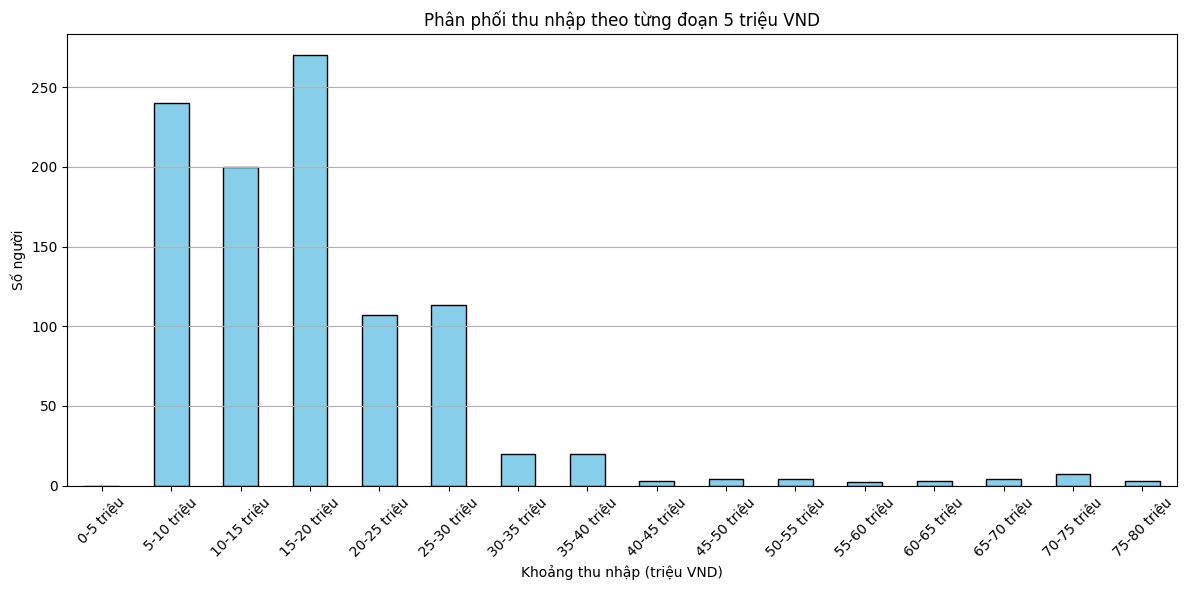

In [6]:
# Vẽ biểu đồ cột
distribution.plot(kind="bar", figsize=(12, 6), color="skyblue", edgecolor="black")
plt.title("Phân phối thu nhập theo từng đoạn 5 triệu VND")
plt.xlabel("Khoảng thu nhập (triệu VND)")
plt.ylabel("Số người")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# jars data distribution

In [5]:
import pandas as pd
import numpy as np
import random

# 1. Định nghĩa danh sách hũ
core_jars = ["NEC", "FFA", "EDU", "LTSS", "PLAY"]
optional_jars = ["GIVE", "HEALTH", "FAMILY", "EMERGENCY", "DREAM"]
all_jars = core_jars + optional_jars

# 2. Trọng số ưu tiên cho Dirichlet (dùng cho phân phối phần trăm)
jar_weights = {
    "NEC": 5, "FFA": 3, "EDU": 2, "LTSS": 2, "PLAY": 2,
    "GIVE": 1, "HEALTH": 1, "FAMILY": 1, "EMERGENCY": 1, "DREAM": 1
}

# 3. Giới hạn phần trăm cho mỗi hũ (min%, max%)
jar_limits = {
    "NEC": (45, 65),  # yêu cầu NEC cao
    "FFA": (5, 20), "EDU": (5, 15), "LTSS": (5, 20), "PLAY": (5, 15),
    "GIVE": (0, 10), "HEALTH": (0, 10), "FAMILY": (0, 15),
    "EMERGENCY": (0, 15), "DREAM": (0, 15)
}

# 4. Hàm tạo phân phối phần trăm cho các hũ đã chọn
def generate_distribution_fixed(jars):
    weights = np.array([jar_weights[j] for j in jars])
    raw = np.random.dirichlet(weights) * 100

    result = {}
    for jar, value in zip(jars, raw):
        min_limit, max_limit = jar_limits[jar]
        
        # Ép giá trị tối thiểu là 5%
        value = max(min_limit, min(max_limit, value))
        value = max(5, round(value / 5) * 5)  # không cho thấp hơn 5%

        result[jar] = value

    # Điều chỉnh tổng = 100%
    total = sum(result.values())
    diff = 100 - total
    keys = list(result.keys())

    while diff != 0:
        for k in keys:
            if diff == 0:
                break
            if diff > 0 and result[k] + 5 <= jar_limits[k][1]:
                result[k] += 5
                diff -= 5
            elif diff < 0 and result[k] - 5 >= max(5, jar_limits[k][0]):
                result[k] -= 5
                diff += 5

    return result

# 5. Hàm cập nhật hũ phụ
def update_optional_jars(prev_jars, last_change_month, current_month):
    if current_month - last_change_month < 4:
        return prev_jars, last_change_month
    if random.random() < 0.8:
        return prev_jars, last_change_month

    # Chọn 1–2 hũ phụ cần thay
    max_change = min(2, len(prev_jars))  # không được chọn nhiều hơn số hũ đang có
    if max_change == 0:
        return prev_jars, last_change_month

    n_change = random.randint(1, max_change)

    optional_pool = [j for j in optional_jars if j not in prev_jars]
    if len(optional_pool) < n_change:
        n_change = len(optional_pool)
    if n_change == 0:
        return prev_jars, last_change_month  # Không còn hũ để thay

    jars_to_remove = random.sample(prev_jars, k=n_change)
    jars_to_add = random.sample(optional_pool, k=n_change)
    new_optional = [j for j in prev_jars if j not in jars_to_remove] + jars_to_add

    return new_optional, current_month



# 6. Hàm sinh dữ liệu người dùng theo tháng
def generate_user_distributions(n_users=10000):
    rows = []
    for user_id in range(n_users):
        n_optional = random.randint(0, 5)
        current_optional = random.sample(optional_jars, k=n_optional)
        last_change_month = 1
        current_distribution = {}

        for month in range(1, 13):
            # Cứ mỗi 4 tháng (tháng 1, 5, 9), có thể đổi optional jars và phân phối
            if month in [1, 5, 9]:
                current_optional, last_change_month = update_optional_jars(
                    current_optional, last_change_month, month
                )
                jars = core_jars + current_optional
                current_distribution = generate_distribution_fixed(jars)

            for jar, percent in current_distribution.items():
                rows.append({
                    "user_id": user_id,
                    "month": month,
                    "jar": jar,
                    "percent": percent
                })
    return pd.DataFrame(rows)



In [9]:
df = generate_user_distributions(n_users=1000)
df.to_csv("jars_distribution.csv", index=False)
print(df.head(10))


   user_id  month     jar  percent
0        0      1     NEC       50
1        0      1     FFA       20
2        0      1     EDU        5
3        0      1    LTSS        5
4        0      1    PLAY       15
5        0      1  HEALTH        5
6        0      2     NEC       50
7        0      2     FFA       20
8        0      2     EDU        5
9        0      2    LTSS        5


# jars distribution thông kê


In [10]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("jars_distribution.csv")

# Lấy danh sách hũ từng tháng cho từng người dùng
def get_user_jar_changes(df):
    results = []

    for user_id, group in df.groupby("user_id"):
        group = group.sort_values("month")
        last_jars = None
        for month, month_group in group.groupby("month"):
            current_jars = set(month_group["jar"])
            if last_jars is not None and current_jars != last_jars:
                jars_removed = sorted(list(last_jars - current_jars))
                jars_added = sorted(list(current_jars - last_jars))
                results.append({
                    "user_id": user_id,
                    "month": month,
                    "jars_removed": jars_removed,
                    "jars_added": jars_added,
                })
            last_jars = current_jars

    return pd.DataFrame(results)

# Gọi hàm
changes_df = get_user_jar_changes(df)

# Xem một vài dòng đầu
print(changes_df.head())


   user_id  month        jars_removed         jars_added
0        0      5            [HEALTH]             [GIVE]
1        2      9      [FAMILY, GIVE]    [DREAM, HEALTH]
2       10      5   [EMERGENCY, GIVE]   [FAMILY, HEALTH]
3       10      9    [FAMILY, HEALTH]  [EMERGENCY, GIVE]
4       14      9  [DREAM, EMERGENCY]   [FAMILY, HEALTH]


In [12]:
import pandas as pd

# Đọc lại file dữ liệu nếu cần
df = pd.read_csv("jars_distribution.csv")

# Đếm số lần mỗi hũ xuất hiện (tức là được phân bổ phần trăm chi tiêu trong một tháng của một người dùng)
jar_usage_counts = df["jar"].value_counts().reset_index()
jar_usage_counts.columns = ["jar", "usage_count"]

# Sắp xếp giảm dần theo số lần sử dụng
jar_usage_counts = jar_usage_counts.sort_values(by="usage_count", ascending=False)

print(jar_usage_counts)


         jar  usage_count
0        NEC        12000
1        FFA        12000
2        EDU        12000
3       LTSS        12000
4       PLAY        12000
5     HEALTH         6200
6       GIVE         5960
7  EMERGENCY         5848
8      DREAM         5848
9     FAMILY         5832


# kết hợp income with jars

In [13]:
import pandas as pd

# Đọc file
df_jars = pd.read_csv("jars_distribution.csv")
df_income = pd.read_csv("vietnam_income_distribution_2024.csv")

# Gán income theo user_id
df_jars["income"] = df_jars["user_id"].map(df_income["Income"].to_dict())

# Lưu lại
df_jars.to_csv("jars_distribution_with_income.csv", index=False)


In [14]:
import pandas as pd
import numpy as np

# Đọc dữ liệu đã có
df = pd.read_csv("jars_distribution_with_income.csv")

# Sinh giá trị spending_percent ~ N(100, 20)
np.random.seed(42)  # để tái lập kết quả
df["spending_percent"] = np.random.normal(loc=100, scale=20, size=len(df))

# Giới hạn giá trị từ 0 đến 200%
df["spending_percent"] = df["spending_percent"].clip(lower=0, upper=200)

# Làm tròn đến 1 chữ số thập phân
df["spending_percent"] = df["spending_percent"].round(1)

# Lưu lại
df.to_csv("jars_distribution_with_spending.csv", index=False)


In [15]:
import pandas as pd

# Đọc lại file có spending_percent
df = pd.read_csv("jars_distribution_with_spending.csv")

# Tính actual_spent_amount
df["actual_spent_amount"] = (df["income"] * df["percent"] / 100) * (df["spending_percent"] / 100)

# Làm tròn đến gần 1,000 VND cho thực tế hơn
df["actual_spent_amount"] = df["actual_spent_amount"].round(-3)

# Lưu file
df.to_csv("jars_distribution_with_actual.csv", index=False)


# thông kế jars_distribution_with_actual

In [16]:
import pandas as pd

df = pd.read_csv("jars_distribution_with_actual.csv")

# Tổng số người dùng
n_users = df["user_id"].nunique()

# Số tháng khác nhau
n_months = df["month"].nunique()

# Tổng số bản ghi
total_records = len(df)

# Tổng chi tiêu thực tế toàn bộ
total_actual_spent = df["actual_spent_amount"].sum()

# Thu nhập trung bình
avg_income = df["income"].mean()

# Chi tiêu thực tế trung bình mỗi tháng/mỗi người
avg_spent_per_user_month = df.groupby(["user_id", "month"])["actual_spent_amount"].sum().mean()

# In kết quả
print(f"📌 Số người dùng: {n_users}")
print(f"📌 Số tháng theo dõi: {n_months}")
print(f"📌 Tổng số dòng dữ liệu: {total_records}")
print(f"💰 Tổng chi tiêu thực tế: {total_actual_spent:,.0f} VND")
print(f"💵 Thu nhập trung bình: {avg_income:,.0f} VND")
print(f"💸 Chi tiêu trung bình mỗi người/tháng: {avg_spent_per_user_month:,.0f} VND")


📌 Số người dùng: 1000
📌 Số tháng theo dõi: 12
📌 Tổng số dòng dữ liệu: 89688
💰 Tổng chi tiêu thực tế: 212,463,090,000 VND
💵 Thu nhập trung bình: 17,723,695 VND
💸 Chi tiêu trung bình mỗi người/tháng: 17,705,258 VND


In [17]:
# Tổng tiền thực tế đã chi cho từng hũ
jar_total_spending = df.groupby("jar")["actual_spent_amount"].sum().sort_values(ascending=False)

# Trung bình % phân bổ kế hoạch cho mỗi hũ
jar_avg_plan_percent = df.groupby("jar")["percent"].mean().sort_values(ascending=False)

# Trung bình % chi tiêu thực tế (so với kế hoạch)
jar_avg_spending_percent = df.groupby("jar")["spending_percent"].mean().sort_values(ascending=False)

# Gộp lại thành bảng
jar_stats = pd.DataFrame({
    "Tổng chi tiêu thực tế (VND)": jar_total_spending,
    "Trung bình kế hoạch (%)": jar_avg_plan_percent,
    "Trung bình thực chi (%)": jar_avg_spending_percent
})

print(jar_stats.round(2))


           Tổng chi tiêu thực tế (VND)  Trung bình kế hoạch (%)  \
jar                                                               
DREAM                     6.334759e+09                     6.12   
EDU                       1.772595e+10                     8.34   
EMERGENCY                 6.523939e+09                     6.20   
FAMILY                    6.220204e+09                     6.07   
FFA                       2.458346e+10                    11.63   
GIVE                      6.286990e+09                     5.89   
HEALTH                    6.556794e+09                     5.83   
LTSS                      2.098683e+10                     9.92   
NEC                       9.819039e+10                    46.18   
PLAY                      1.905378e+10                     9.04   

           Trung bình thực chi (%)  
jar                                 
DREAM                       100.11  
EDU                         100.17  
EMERGENCY                   100.20  
FAMILY    